In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import h5py

## create known temp conv dependent dataset

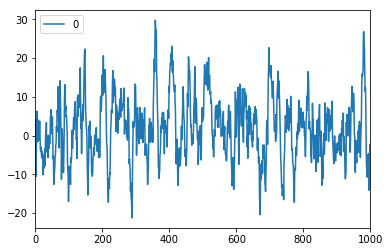

In [8]:
X = np.random.uniform(-100,100,size=(1000,4))

y = []
for idx in range(X.shape[0]):
    y.append(np.mean(X[idx:idx+10, :]))

y = np.array(y)
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y[::-1])
df_y.plot()

In [9]:
X_file = h5py.File('datasets/X/3', 'w')
X_file.create_dataset('X', data=X)
X_file.close()

y_file = h5py.File('datasets/y/3', 'w')
y_file.create_dataset('y', data=y)
y_file.close()

In [80]:
results = [[[-46], [-0.00033001888554462511], [0.0079058435791577366]], [[-43], [-0.00024839384290542554], [0.015434315808634642]], [[-40], [-0.0011026954103199316], [-0.0078096754043511735]], [[-37], [0.19057140756546376], [0.43743297558507849]], [[-34], [0.49069539642278526], [0.70680916331509058]], [[-31], [0.85500364584074007], [0.92644403883415027]], [[-28], [0.93404038781432241], [0.97086116469050865]], [[-25], [0.94346926139117482], [0.97329165806350726]], [[-22], [0.94018445730759137], [0.9752624242823924]], [[-19], [0.94463477520780459], [0.97464426140495808]], [[-16], [0.94359970007045546], [0.9753551986425012]], [[-13], [0.77614225403576942], [0.88558049218571377]], [[-10], [0.39384627194201294], [0.63460116187846105]], [[-7], [0.073392921617480567], [0.27477530890235202]], [[-4], [-0.002925351424245326], [0.0020718298960015055]], [[-1], [-0.00019235651064897219], [0.0075112785193127149]], [[2], [-0.0039174108164599097], [-0.0034893588652488063]], [[5], [-0.0021085444753679017], [-0.0012451337998710173]], [[8], [-0.0020451655736886121], [-0.016741583520067431]], [[11], [-0.00085608593015629175], [-0.011813925977228109]], [[14], [-0.00067299857685099163], [-0.0071313312043455113]], [[17], [-0.00089263012372930994], [-0.017527757569746671]], [[20], [-0.004994459307342991], [-0.017046285666178135]], [[23], [-0.0023779891877555581], [-0.016120420754651209]], [[26], [-0.001734858104143866], [-0.01788280469474646]], [[29], [-0.0040087164197131209], [-0.020668259156562251]], [[32], [-0.0043816330095525213], [-0.013412122902656587]], [[35], [-0.0010414733004637799], [0.0091452523355209665]], [[38], [-0.00073091190414009688], [0.015786059378181727]]]

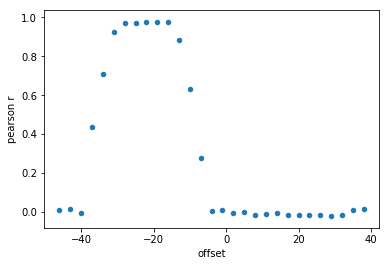

In [81]:
rs = pd.DataFrame({
    'pearson r' : [result[2][0] for result in results],
    'offset' : [result[0][0] for result in results]
})
rs.plot.scatter(x='offset', y='pearson r')

In [35]:
results = [[-4000, [-0.0057727091755468418], [0.28113732783996909]], [-2000, [0.03795431435157004], [0.33794483450949275]], [-500, [0.063992246733879377], [0.36399341865529788]], [-10, [0.086467456277417143], [0.38811192266599481]], [-5, [0.14144812469037904], [0.40903864675135232]], [0, [0.13995353187616821], [0.42204764979421872]], [5, [0.093100869350770998], [0.40019251001718736]], [10, [0.10247193360524975], [0.40357521206982933]], [500, [0.183594634773113], [0.46418983095341704]], [2000, [0.095450788112417806], [0.34080971150261652]], [4000, [0.077874026378875971], [0.3321814855398742]]]
rs = pd.DataFrame({
    'offset' : [result[0] for result in results],
    'pearson r' : [result[2][0] for result in results],
    'R2' : [result[1][0] for result in results]
})
rs

,R2,offset,pearson r
0,-0.005773,-4000,0.281137
1,0.037954,-2000,0.337945
2,0.063992,-500,0.363993
3,0.086467,-10,0.388112
4,0.141448,-5,0.409039
5,0.139954,0,0.422048
6,0.093101,5,0.400193
7,0.102472,10,0.403575
8,0.183595,500,0.464190
9,0.095451,2000,0.340810


In [36]:
results = [[-4000, [-3.5950798787935128], [0.08137678678393212]], [-2000, [-1.7541358269973863], [0.011854592425015005]], [-500, [-0.94924301655877374], [0.27516010139355002]], [-10, [0.94497008784303282], [0.97638189319788682]], [-5, [0.8613115147912539], [0.93032498310631129]], [0, [0.79601930345626948], [0.89259592988537395]], [5, [0.01894014215282358], [0.66753134904320643]], [10, [0.70034336733815239], [0.84101899470192587]], [500, [-0.04593746636776741], [0.35340947154455687]], [2000, [-2.0508347260010229], [-0.040341422052581392]], [4000, [-1.7629738427564479], [-0.060753469149527749]]]
rs = pd.DataFrame({
    'offset' : [result[0] for result in results],
    'pearson r' : [result[2][0] for result in results],
    'R2' : [result[1][0] for result in results]
})
rs

,R2,offset,pearson r
0,-3.595080,-4000,0.081377
1,-1.754136,-2000,0.011855
2,-0.949243,-500,0.275160
3,0.944970,-10,0.976382
4,0.861312,-5,0.930325
5,0.796019,0,0.892596
6,0.018940,5,0.667531
7,0.700343,10,0.841019
8,-0.045937,500,0.353409
9,-2.050835,2000,-0.040341


## generate hypothetical dataset breaking temp conv dependence

In [11]:
X = np.random.uniform(-100,100,size=(100000,4))

y = []
for idx in range(X.shape[0]):
    scattered_X = np.array([X[idx+(10*i):idx+(10*(i+1)), i] for i in range(X.shape[1])])
    
    y.append(np.mean(scattered_X))

    
y = np.array(y)
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_y.plot()

ValueError: operands could not be broadcast together with shapes (10,) (9,) 

In [14]:
scattered_X = np.array([X[0+(10*i):0+(10*(i+1)), i] for i in range(X.shape[1])])
scattered_X.shape


(4, 10)